### Esercitazione 10

### Parallelizzazione di un Algoritmo Genetico per la risoluzione del TSP con MPI

In questa simulazione è stato parallelizzato l' algoritmo genetico creato precedentemente utilizzando librerie MPI per risolvere il problema del commesso viaggiatore. L’obiettivo è eseguire fino a 10 ricerche GA parallele e indipendenti dell’ottimo percorso,esse rappresentano diversi continenti dove si sviluppa una diversa popolazione in ognuno di essi.
Ogni nodo esegue una ricerca GA indipendente, ma ogni $N_{migr}$ generazioni i continenti scambiano i loro migliori individui. Questo schema permette di bilanciare l’esplorazione indipendente dello spazio delle soluzioni con la cooperazione tra processi, migliorando la convergenza globale.

Come nella precedente simulazione confrontiamo i casi con:
- **34 città disposte casualmente su una circonferenza**
- **34 città disposte casualmente all' interno di un quadrato**
- **39 capitali europee**




In [61]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def find_best_rank(base_name):
    best_loss = float("inf")
    best_rank = -1
    for rank in range(10):
        try:
            data = np.loadtxt(f"../OUTPUT/{base_name}LossRank{rank}.dat", delimiter=",")
            final_loss = data[-1, 0]
            if final_loss < best_loss:
                best_loss = final_loss
                best_rank = rank
        except Exception as e:
            print(f"[WARNING] Could not read loss for rank {rank}: {e}")
    if best_rank == -1:
        print("[ERROR] Nessun file di loss valido trovato.")
    return best_rank, best_loss


def plot_best_path(base_name, coord_file, coord_delim=",", image_file=None, xlim=None, ylim=None):
    try:
        dati = np.loadtxt(coord_file, delimiter=coord_delim)
    except FileNotFoundError as e:
        print(f"[ERROR] Coordinate file not found: {e}")
        return

    best_rank, best_loss = find_best_rank(base_name)
    if best_rank == -1:
        print(f"[ERROR] Nessun rank valido per {base_name}")
        return

    print(f"Miglior path trovato nel rank {best_rank} con loss finale = {best_loss}")

    try:
        path = np.loadtxt(f"../OUTPUT/{base_name}Path{best_rank}.dat")
    except FileNotFoundError as e:
        print(f"[ERROR] Path file not found: {e}")
        return

    x, y = dati[:, 0], dati[:, 1]
    xp = [x[int(el - 1)] for el in path] + [x[int(path[0] - 1)]]
    yp = [y[int(el - 1)] for el in path] + [y[int(path[0] - 1)]]

    plt.figure(figsize=(10, 8))
    if image_file:
        try:
            img = Image.open(image_file).transpose(method=Image.FLIP_TOP_BOTTOM)
            plt.imshow(img)
        except Exception as e:
            print(f"Could not load image: {e}")
    else:
        plt.scatter(x, y, color="red")

    plt.plot(xp, yp, color="black")
    for i, el in enumerate(path):
        plt.text(xp[i] + 0.02, yp[i] + 0.02, str(int(el)), fontsize=6, color="black")
    if xlim: plt.xlim(xlim)
    if ylim: plt.ylim(ylim)

    plt.grid()
    plt.title(f"Best Path - {base_name} (rank {best_rank})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()


def plot_losses(base_name):
    generations = range(2000)
    for what in ["Loss", "AvgLoss"]:
        plt.figure(figsize=(10, 6))
        for rank in range(10):
            try:
                data = np.loadtxt(f"../OUTPUT/{base_name}LossRank{rank}.dat", delimiter=",")
                values = data[:, 0] if what == "Loss" else data[:, 1]
                plt.plot(generations, values, label=f"Rank {rank}", alpha=0.7)
            except:
                print(f"Could not load {what} for rank {rank}")
        plt.title(f"{what} Function - {base_name}")
        plt.xlabel("Generation")
        plt.ylabel("L")
        plt.grid()
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()
        plt.close()




Miglior path trovato nel rank 6 con loss finale = 6.24186


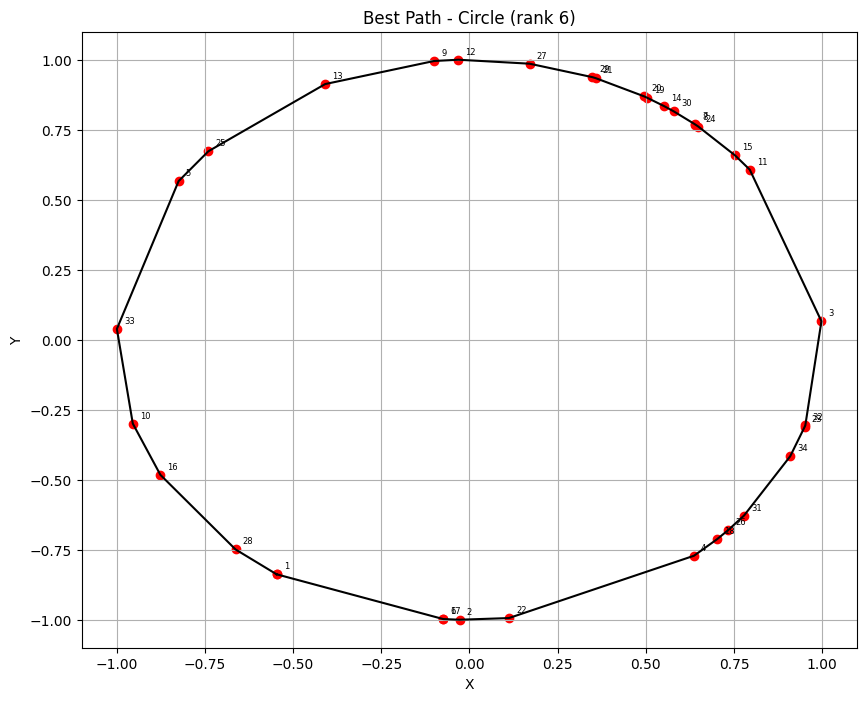

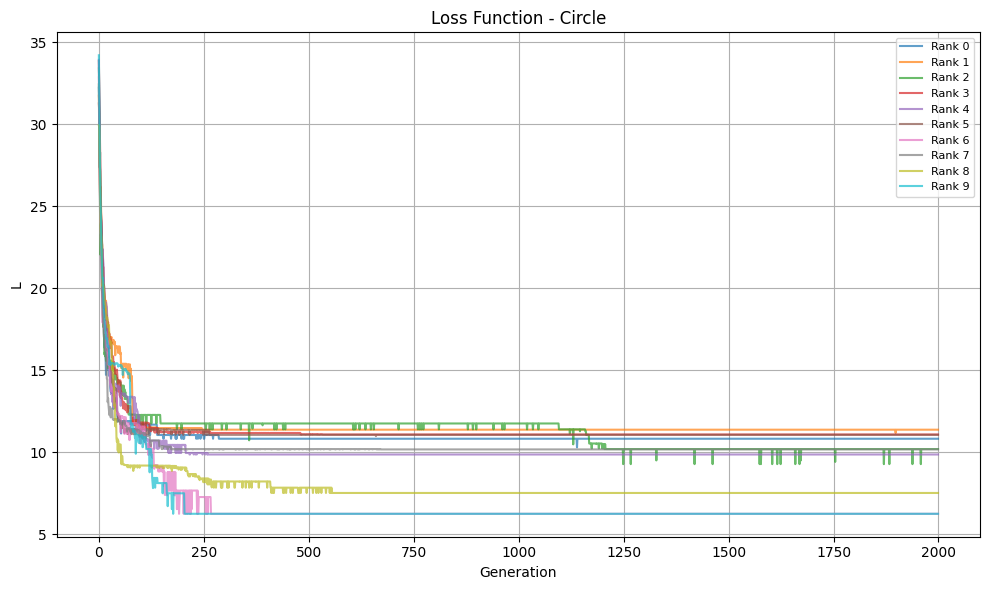

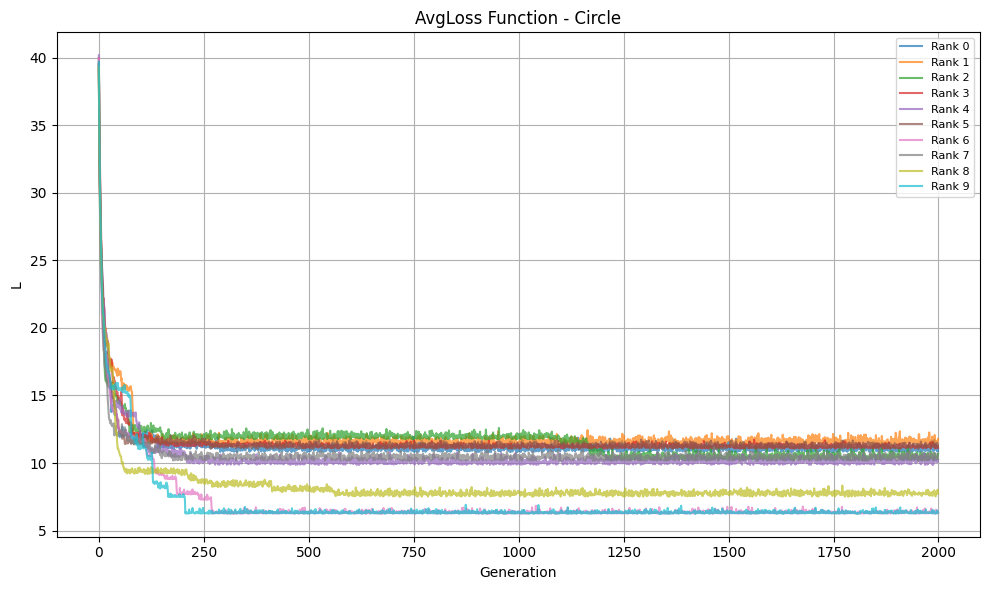

In [62]:
base_name = "Circle"
coord_file = "../OUTPUT/Circle.dat"
coord_delim = ","
xlim = None
ylim = None
image_file = None
plot_best_path(base_name, coord_file, coord_delim=coord_delim, image_file=image_file, xlim=xlim, ylim=ylim)
plot_losses(base_name)


Miglior path trovato nel rank 4 con loss finale = 5.38331


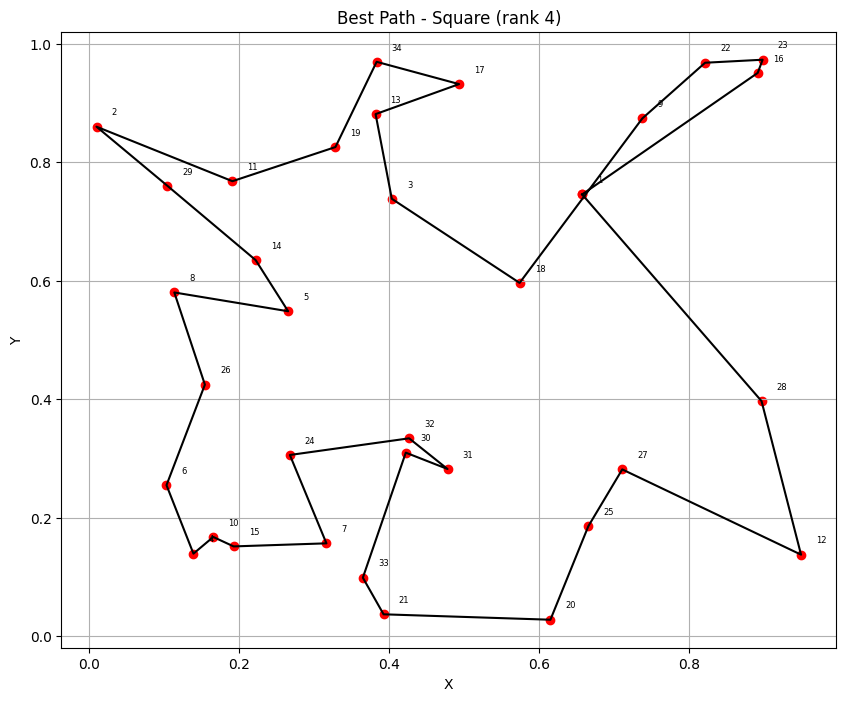

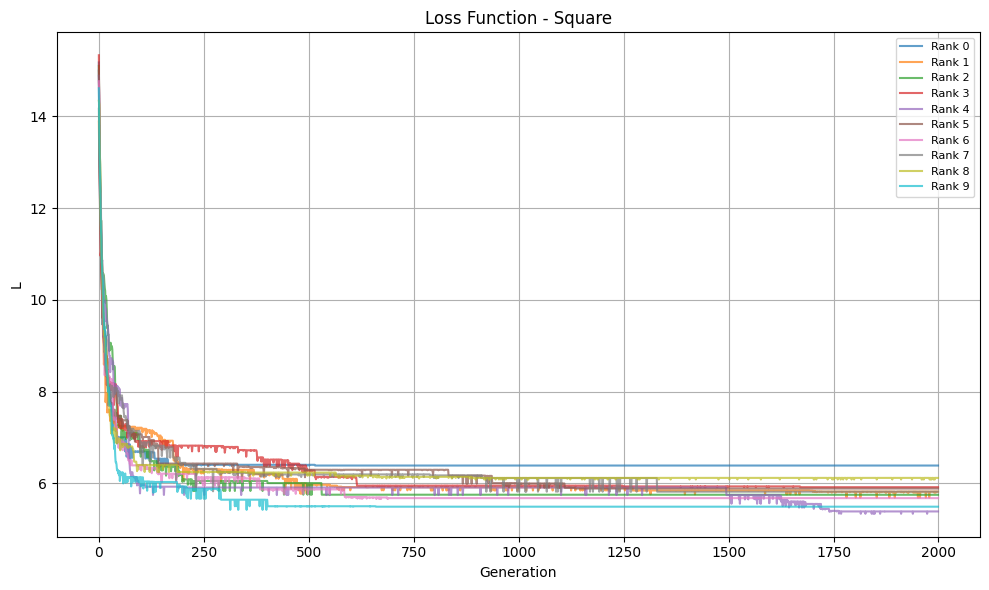

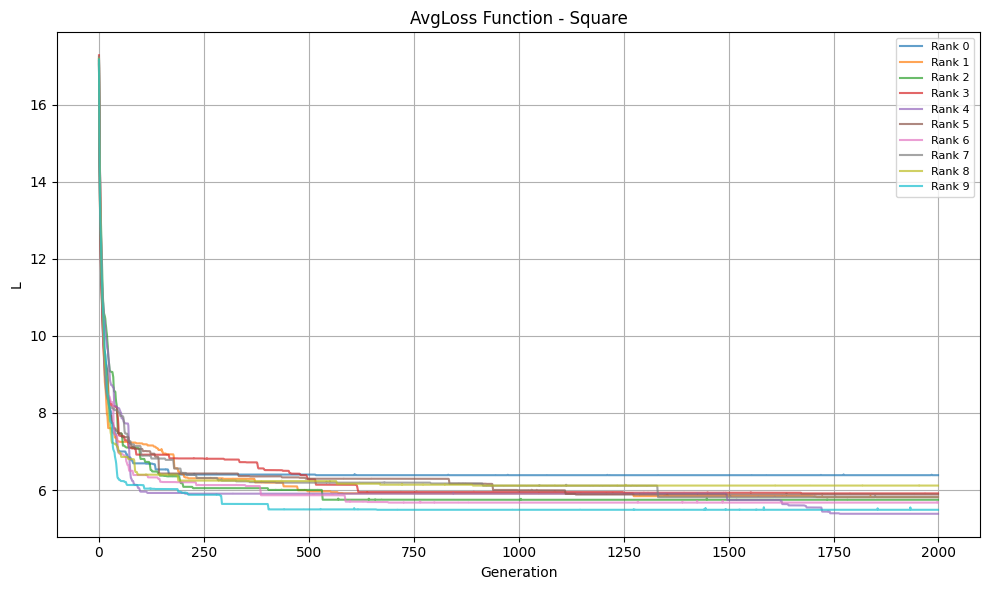

In [63]:
base_name = "Square"
coord_file = "../OUTPUT/Square.dat"
coord_delim = ","
xlim = None
ylim = None
image_file = None
plot_best_path(base_name, coord_file, coord_delim=coord_delim, image_file=image_file, xlim=xlim, ylim=ylim)
plot_losses(base_name)


Miglior path trovato nel rank 6 con loss finale = 2895.31


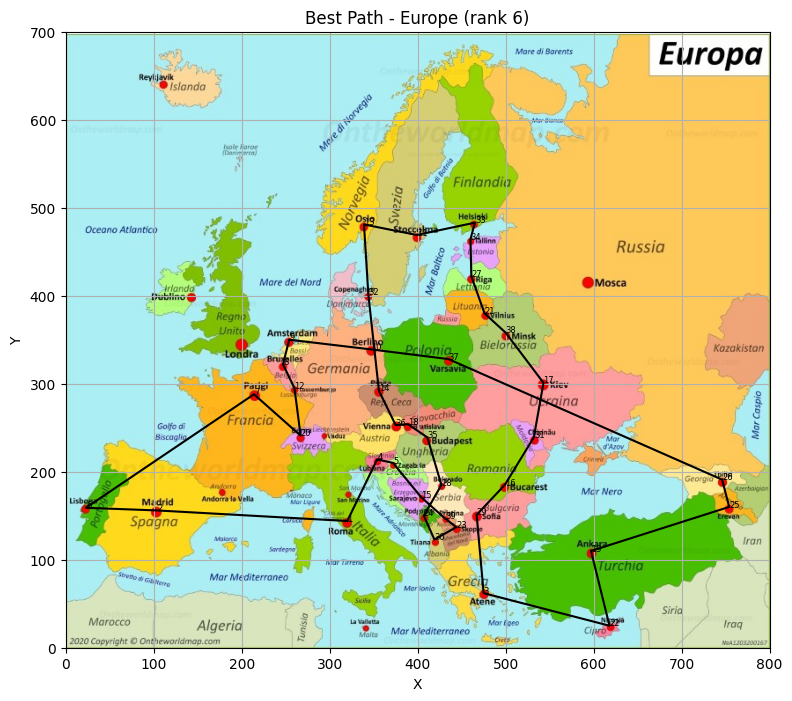

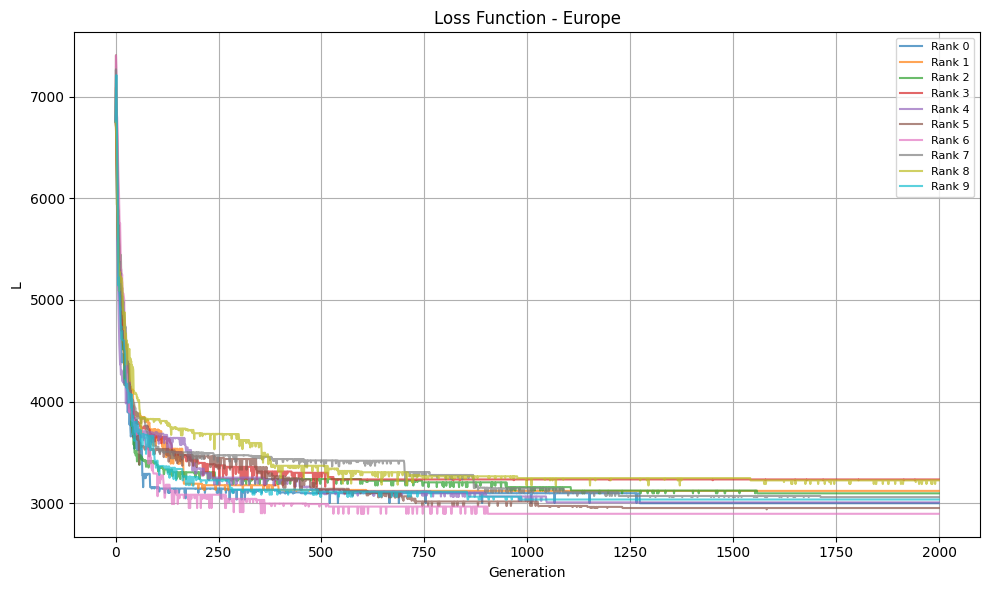

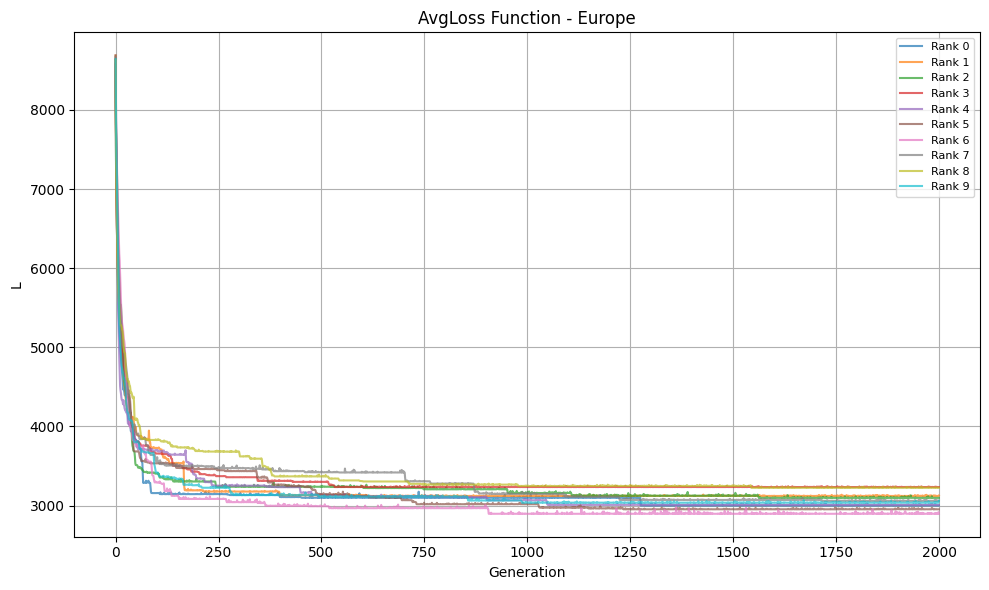

In [64]:
base_name = "Europe"
coord_file = "../INPUT/europa.dat"
coord_delim = " "
image_file = "../INPUT/europa.jpg"
xlim = (0, 800)
ylim = (0, 700)
plot_best_path(base_name, coord_file, coord_delim=coord_delim, image_file=image_file, xlim=xlim, ylim=ylim)
plot_losses(base_name)

### Applicazione per 110 capoluoghi di provincia italiani

L’algoritmo parallelo è stato applicato al problema del commesso viaggiatore anche per i 110 capoluoghi d' italia: 


Miglior path trovato nel rank 4 con loss finale = 88.2709


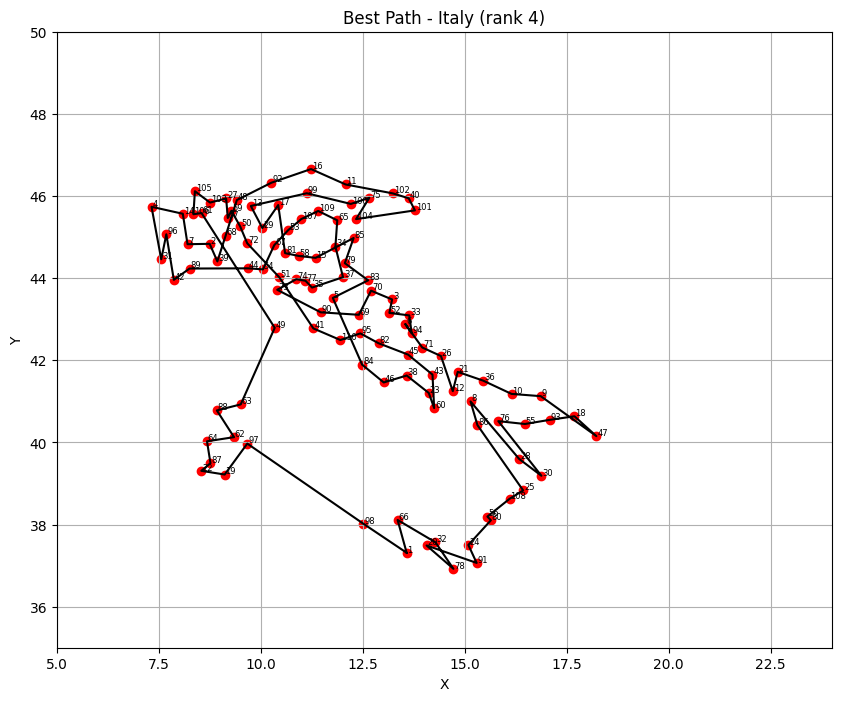

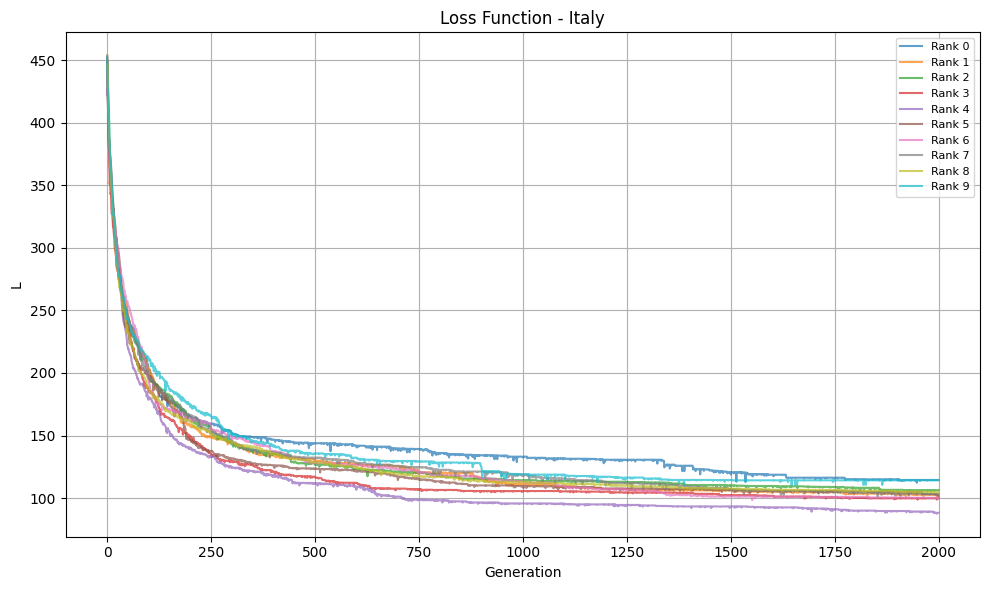

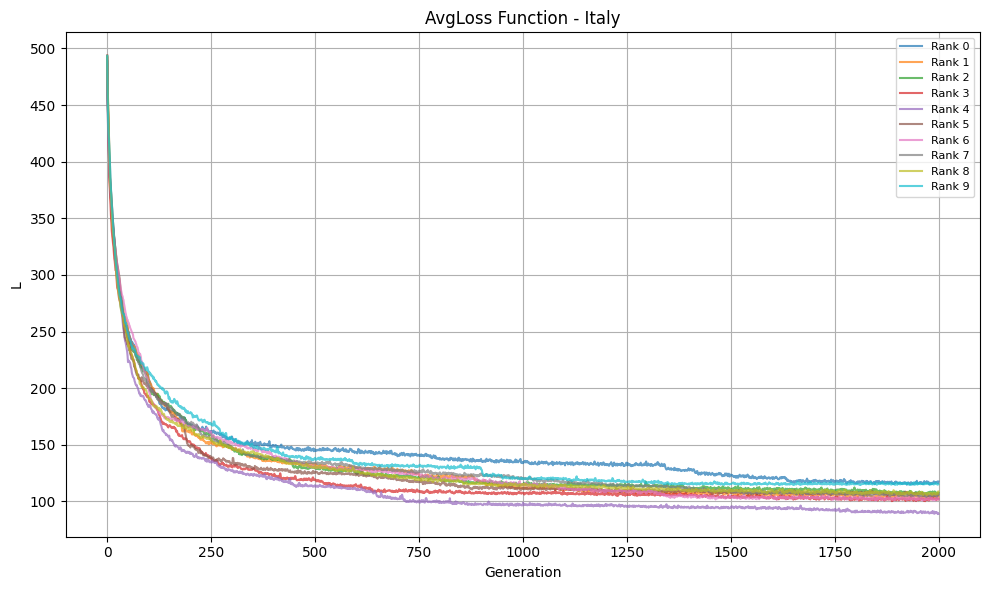

In [65]:
base_name = "Italy"
coord_file = "../INPUT/cap_prov_ita.dat"
coord_delim = " "
image_file = None
xlim = (5, 24)
ylim = (35, 50)
plot_best_path(base_name, coord_file, coord_delim=coord_delim, image_file=image_file, xlim=xlim, ylim=ylim)
plot_losses(base_name)

La parallelizzazione tramite MPI con divisione in Continenti e migrazione periodica dei migliori individui risulta una strategia efficace per migliorare le prestazioni di un algoritmo genetico nel risolvere il problema del commesso viaggiatore.
Il confronto con ricerche GA indipendenti evidenzia come la cooperazione tra processi migliori significativamente la qualità della soluzione.
